In [12]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
password = getpass.getpass()

········


In [13]:
sql_string = 'mysql+pymysql://root:' + password + '@localhost/sakila' #connecting to the SQL query 
engine = create_engine(sql_string)
query1 = '''
SELECT 
    film.rental_rate, r.rental_id, cat.name AS 'film_category'
FROM
    rental AS r
        JOIN
    inventory AS inv USING (inventory_id)
        JOIN
    film AS film USING (film_id)
        JOIN
    film_category AS ficat USING (film_id)
        JOIN
    category AS cat USING (category_id);
    '''

query2 = '''
SELECT 
    films.title,
    rentals.rental_id,
    YEAR(rentals.rental_date) = 2006
        AND MONTH(rentals.rental_date) = 2 AS 'rented_last_month',
    rentals.rental_date
FROM
    sakila.film AS films
        JOIN
    sakila.inventory AS inv USING (film_id)
        JOIN
    sakila.rental AS rentals USING (inventory_id);
      '''

data = pd.read_sql_query(query1, engine) #Read the data into a Pandas dataframe
data1 = pd.read_sql_query(query2, engine)



In [14]:
data1

,title,rental_id,rented_last_month,rental_date
0,ACADEMY DINOSAUR,4863,0,2005-07-08 19:03:15
1,ACADEMY DINOSAUR,11433,0,2005-08-02 20:13:10
2,ACADEMY DINOSAUR,14714,0,2005-08-21 21:27:43
3,ACADEMY DINOSAUR,16050,0,2023-05-27 14:45:04
4,ACADEMY DINOSAUR,972,0,2005-05-30 20:21:07
...,...,...,...,...
16040,ZORRO ARK,711,0,2005-05-29 03:49:03
16041,ZORRO ARK,1493,0,2005-06-15 21:50:32
16042,ZORRO ARK,6712,0,2005-07-12 13:24:47
16043,ZORRO ARK,9701,0,2005-07-31 07:32:21


In [8]:
data

,rental_rate,rental_id,film_category
0,0.99,10895,Action
1,0.99,12268,Action
2,0.99,3150,Action
3,0.99,5072,Action
4,0.99,9080,Action
...,...,...,...
16040,4.99,962,Travel
16041,4.99,1292,Travel
16042,4.99,4108,Travel
16043,4.99,8871,Travel


In [15]:
#Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.

In [16]:
data.describe()

,rental_rate,rental_id
count,16045.000000,16045.000000
mean,2.942509,8025.871611
std,1.649698,4633.066013
min,0.990000,1.000000
25%,0.990000,4014.000000
50%,2.990000,8026.000000
75%,4.990000,12038.000000
max,4.990000,16050.000000


In [17]:
data.dtypes

rental_rate      float64
rental_id          int64
film_category     object
dtype: object

In [18]:
data.info

<bound method DataFrame.info of        rental_rate  rental_id film_category
0             0.99      10895        Action
1             0.99      12268        Action
2             0.99       3150        Action
3             0.99       5072        Action
4             0.99       9080        Action
...            ...        ...           ...
16040         4.99        962        Travel
16041         4.99       1292        Travel
16042         4.99       4108        Travel
16043         4.99       8871        Travel
16044         4.99      15488        Travel

[16045 rows x 3 columns]>

In [19]:
data.dtypes

rental_rate      float64
rental_id          int64
film_category     object
dtype: object

In [20]:
data.isna().sum()

rental_rate      0
rental_id        0
film_category    0
dtype: int64

In [21]:
#checking numerical and categorical values

In [22]:
numeric = data.select_dtypes(include = np.number)

In [23]:
numeric.isna().sum()

rental_rate    0
rental_id      0
dtype: int64

In [24]:
categorical = data.select_dtypes(include = object)
categorical.head()

,film_category
0,Action
1,Action
2,Action
3,Action
4,Action


In [25]:
categorical.isna().sum()

film_category    0
dtype: int64

In [44]:
#extracting date and month
data['rental_month'] = pd.DatetimeIndex(data['max_rental_date']).month
data['rental_year'] = pd.DatetimeIndex(data['max_rental_date']).year
data

,title,length,rating,avg_price,total_rented,max_rental_date,name,rental_month,rental_year
0,AMADEUS HOLY,89,PG,1.609048,21,2006-02-14 15:16:03,Action,2,2006
1,AMERICAN CIRCUS,99,R,7.626364,22,2006-02-14 15:16:03,Action,2,2006
2,BERETS AGENT,90,PG-13,3.751429,21,2006-02-14 15:16:03,Action,2,2006
3,BULL SHAWSHANK,93,NC-17,1.365000,16,2006-02-14 15:16:03,Action,2,2006
4,DANCES NONE,100,NC-17,2.275714,14,2006-02-14 15:16:03,Action,2,2006
...,...,...,...,...,...,...,...,...,...
953,IMPACT ALADDIN,98,PG-13,2.323333,9,2005-08-18 03:37:31,Music,8,2005
954,TOWERS HURRICANE,85,NC-17,1.171818,11,2005-08-18 02:37:07,Classics,8,2005
955,HOOSIERS BIRDCAGE,103,G,5.240000,8,2005-08-18 00:14:03,Foreign,8,2005
956,PAPI NECKLACE,84,PG,3.615000,8,2005-08-17 17:16:42,Travel,8,2005


In [26]:
#checking correlation 

C:\Users\a_del\AppData\Local\Temp\ipykernel_864\187203700.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data.corr(method='pearson')


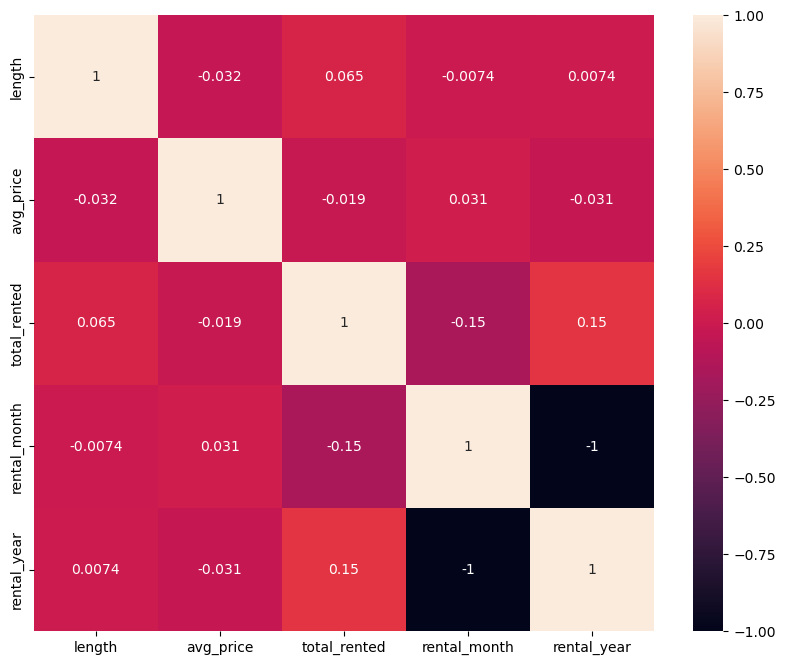

In [58]:
corr_matrix=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
##Create a query (already did at the beginning) to get the list of films and a boolean indicating if it was rented last month. 
#This would be our target variable.

In [27]:
data2 = pd.concat([data1,data],axis=1) #merging the dataframes 

In [28]:
data2 = data2.drop('rental_date', axis=1)
data2['rented_last_month'] = data2['rented_last_month'].astype(bool)
data2.head() #changing the values for 'rented_last_month' to boolean as we will need later 

,title,rental_id,rented_last_month,rental_rate,rental_id,film_category
0,ACADEMY DINOSAUR,4863,False,0.99,10895,Action
1,ACADEMY DINOSAUR,11433,False,0.99,12268,Action
2,ACADEMY DINOSAUR,14714,False,0.99,3150,Action
3,ACADEMY DINOSAUR,16050,False,0.99,5072,Action
4,ACADEMY DINOSAUR,972,False,0.99,9080,Action


In [29]:
data2 = data2.drop('rental_id', axis=1)

In [30]:
#Create a logistic regression model to predict this variable from the cleaned data.

In [33]:
X = pd.get_dummies(data2.drop('rented_last_month', axis=1))

Y = data2['rented_last_month']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)






In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Evaluate the results

In [35]:
classification.score(X_test, y_test)

0.987120897382634